In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df3=pd.read_csv('/content/df_FINAL.csv')

In [3]:
print(df3.shape)

(109541, 42)


In [4]:
df3.head()

,Age,Education,IncomeTotal,DebtToIncome,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,VerificationType,...,HomeOwnershipType_Homeless,HomeOwnershipType_Joint_ownership,HomeOwnershipType_Joint_tenant,HomeOwnershipType_Living_with_Parents,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Owner_with_encumbrance,HomeOwnershipType_Tenant_pre_furnished_property,HomeOwnershipType_Tenant_unfurnished_property
0,53,4,354.0,26.29,2125.0,2125.0,20.97,60,62.05,4,...,0,0,0,0,0,0,1,0,0,0
1,50,5,900.0,30.58,3000.0,3000.0,17.12,60,84.75,1,...,0,0,0,0,0,0,1,0,0,0
2,44,4,1200.0,26.71,10630.0,9100.0,13.67,60,268.57,4,...,0,0,0,0,1,0,0,0,0,0
3,42,2,863.0,7.36,1500.0,1500.0,40.40,60,63.53,3,...,0,0,0,1,0,0,0,0,0,0
4,34,4,697.0,36.04,1595.0,1090.0,68.39,48,101.19,4,...,0,0,0,0,0,0,0,0,1,0


In [5]:
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve, RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, classification_report, make_scorer

In [6]:
X = df3.drop("Status", axis=1)  
y = df3["Status"]  

In [7]:
# Step 1: Data Preprocessing and Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Resampling with ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [8]:
# Check the number of samples before and after SMOTE resampling
print("Before ADASYN resampling:")
print("Number of samples in X_train: ", len(X_train))
print("Number of samples in y_train: ", len(y_train))

print("\nAfter ADASYN resampling:")
print("Number of samples in X_train_resampled: ", len(X_train_resampled))
print("Number of samples in y_train_resampled: ", len(y_train_resampled))

Before ADASYN resampling:
Number of samples in X_train:  87632
Number of samples in y_train:  87632

After ADASYN resampling:
Number of samples in X_train_resampled:  107617
Number of samples in y_train_resampled:  107617


In [9]:
import pandas as pd

# Convert the resampled labels into a DataFrame and count occurrences
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Status'])
print("Distribution of classes after ADASYN resampling:")
print(y_train_resampled_df['Status'].value_counts())

Distribution of classes after ADASYN resampling:
Status
0    55134
1    52483
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import learning_curve

In [ ]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, make_scorer

# Define LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

rfecv = RFECV(
    estimator=lgbm,
    step=1,
    cv=StratifiedKFold(5),
    scoring='f1',
    min_features_to_select=1
)

rfecv.fit(X_train_resampled, y_train_resampled)



[LightGBM] [Info] Number of positive: 41986, number of negative: 44107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 86093, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487682 -> initscore=-0.049282
[LightGBM] [Info] Start training from score -0.049282
[LightGBM] [Info] Number of positive: 41986, number of negative: 44107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 86093, number of used features: 40
[LightGBM] [Info] 

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LGBMClassifier(random_state=42), scoring='f1')

In [ ]:
# Extracting the selected features from RFECV
selected_features_mask = rfecv.support_ 
selected_features = X_train_resampled.columns[selected_features_mask]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'Education', 'IncomeTotal', 'DebtToIncome', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'VerificationType', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'ExistingLiabilities', 'LiabilitiesTotal', 'NewCreditCustomer',
       'FreeCash', 'Country_EE', 'Country_ES', 'Country_FI', 'Country_SK',
       'EmploymentDurationCurrentEmployer_MoreThan5Years',
       'EmploymentDurationCurrentEmployer_Other',
       'EmploymentDurationCurrentEmployer_Retiree',
       'EmploymentDurationCurrentEmployer_TrialPeriod',
       'EmploymentDurationCurrentEmployer_UpTo1Year',
       'EmploymentDurationCurrentEmployer_UpTo2Years',
       'EmploymentDurationCurrentEmployer_UpTo3Years',
       'EmploymentDurationCurrentEmployer_UpTo4Years',
       'EmploymentDurationCurrentEmployer_UpTo5Years',
       'HomeOwnershipType_Council_house ', 'HomeOwnershipType_Homeless',
 

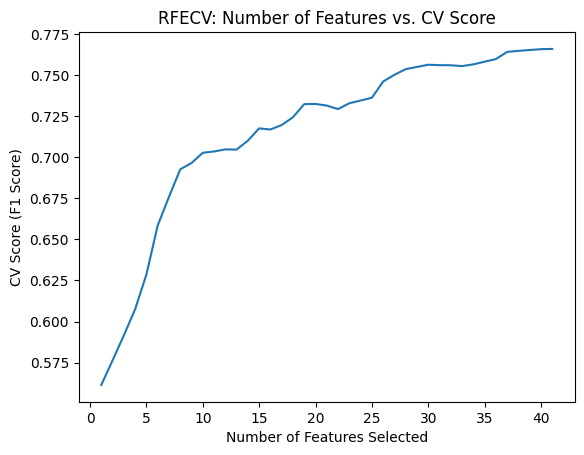

Optimal number of features : 41


In [ ]:
#identify a spot where adding more features doesn't significantly improve the performance, which aids in feature reduction and model simplification.
import matplotlib.pyplot as plt

# Check and plot RFECV results
if hasattr(rfecv, 'cv_results_'):
    # Access mean test scores directly from cv_results_
    mean_score = rfecv.cv_results_['mean_test_score']
    plt.figure()
    plt.title("RFECV: Number of Features vs. CV Score")
    plt.xlabel("Number of Features Selected")
    plt.ylabel("CV Score (F1 Score)")
    plt.plot(range(1, len(mean_score) + 1), mean_score)
    plt.savefig('RFECV: NumberOfFeatures vs CV Score.png')
    plt.show()
else:
    # Older versions fallback (not recommended to rely on this)
    print("Update your scikit-learn to use this feature.")

# Printing optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
import numpy as np

# Assuming `mean_score` contains your cross-validation F1 scores from the RFECV process
score_diffs = np.diff(mean_score)
threshold = 0.002 # Minimal improvement threshold
window_size = 5  # Window size for rolling average
consistent_steps = 5  # Number of steps to consider for consistent minimal improvement

# Calculate rolling average of score differences
rolling_avg_diffs = np.convolve(score_diffs, np.ones(window_size)/window_size, mode='valid')

# Identify where the rolling average stays below the threshold for a consistent number of steps
for i in range(len(rolling_avg_diffs) - consistent_steps + 1):
    if all(rolling_avg_diffs[i:i+consistent_steps] < threshold):
        stabilization_point = i + window_size // 2  
        print(f"Performance stabilizes after {stabilization_point} features, with a CV F1 score of approximately {mean_score[stabilization_point]:.4f}.")
        break
else:
    print("No stabilization point found; consider adjusting the thresholds, window size, or consistent steps.")

Performance stabilizes after 27 features, with a CV F1 score of approximately 0.7535.


In [ ]:
X_train_selected = X_train_resampled[selected_features]

# Initialize and train the lightgbm with only the selected features
final_lgbm = LGBMClassifier(verbose=0, random_state=42)
final_lgbm.fit(X_train_selected, y_train_resampled)

# Get feature importances from the final model
feature_importances = final_lgbm.feature_importances_

# Map these importances back to the feature names
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance to see the most important features
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the sorted DataFrame to view the importance of each feature
print("Feature Importances for Selected Features:")
print(feature_importance_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Feature Importances for Selected Features:
                                             Feature  Importance
0                                                Age         212
14                                  LiabilitiesTotal         198
12                      PreviousRepaymentsBeforeLoan         196
11                   AmountOfPreviousLoansBeforeLoan         191
6                                           Interest         186
2                                        IncomeTotal         174
7                                       LoanDuration         153
8                                     MonthlyPayment         148
13                               ExistingLiabilities         143
3                                       DebtToIncome          99
4                                      AppliedAmount          90
1                                          Education          90
5                               

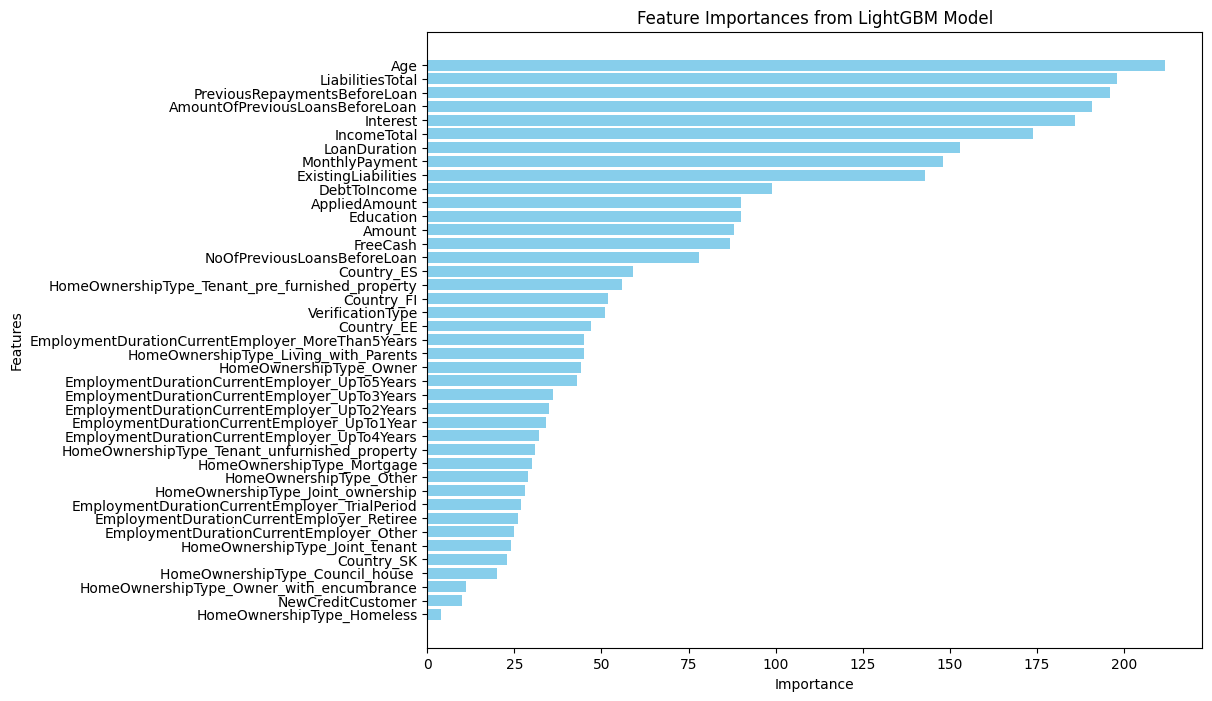

In [ ]:

# Sorting the DataFrame to make the plot more informative
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from LightGBM Model')
plt.savefig('Feature_Importances_from_Lightgbm-Adasyn.png')
plt.show()

In [ ]:
top_features = feature_importance_df.nlargest(41, 'Importance')['Feature'].tolist()

print("Top 41 Features:")
print(top_features)

Top 41 Features:
['Age', 'LiabilitiesTotal', 'PreviousRepaymentsBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'Interest', 'IncomeTotal', 'LoanDuration', 'MonthlyPayment', 'ExistingLiabilities', 'DebtToIncome', 'Education', 'AppliedAmount', 'Amount', 'FreeCash', 'NoOfPreviousLoansBeforeLoan', 'Country_ES', 'HomeOwnershipType_Tenant_pre_furnished_property', 'Country_FI', 'VerificationType', 'Country_EE', 'HomeOwnershipType_Living_with_Parents', 'EmploymentDurationCurrentEmployer_MoreThan5Years', 'HomeOwnershipType_Owner', 'EmploymentDurationCurrentEmployer_UpTo5Years', 'EmploymentDurationCurrentEmployer_UpTo3Years', 'EmploymentDurationCurrentEmployer_UpTo2Years', 'EmploymentDurationCurrentEmployer_UpTo1Year', 'EmploymentDurationCurrentEmployer_UpTo4Years', 'HomeOwnershipType_Tenant_unfurnished_property', 'HomeOwnershipType_Mortgage', 'HomeOwnershipType_Other', 'HomeOwnershipType_Joint_ownership', 'EmploymentDurationCurrentEmployer_TrialPeriod', 'EmploymentDurationCurrentEmployer_Retire

In [ ]:
# Subsetting the training and testing data using the selected top 32 features
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

In [ ]:
# Train the basic model using the selected features from RFECV
basic_lgbm = LGBMClassifier(random_state=42)
basic_lgbm.fit(X_train_selected, y_train_resampled)

# Evaluation
y_pred = basic_lgbm.predict(X_test_selected)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Baseline Model:\n", classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52483, number of negative: 55134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2772
[LightGBM] [Info] Number of data points in the train set: 107617, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487683 -> initscore=-0.049277
[LightGBM] [Info] Start training from score -0.049277
Baseline Accuracy: 0.7060568716052764
Classification Report for Baseline Model:
               precision    recall  f1-score   support

           0       0.68      0.50      0.57      8788
           1       0.71      0.85      0.78     13121

    accuracy                           0.71     21909
   macro avg       0.70      0.67      0.68     21909
weighted

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define the parameter grid for LightGBM
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, -1],
    'num_leaves': [20, 30, 40, 50],
    'reg_lambda': [0.0, 0.01, 0.1, 0.5, 1.0],
    'reg_alpha': [0.0, 0.01, 0.1, 0.5],
    'min_child_samples': [20, 30, 40],
}

# Initialize RandomizedSearchCV with the LGBMClassifier and parameter grid
random_search = RandomizedSearchCV(
    estimator=basic_lgbm,  # Using the model with selected features
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search.fit(X_train_selected, y_train_resampled)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52483, number of negative: 55134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2772
[LightGBM] [Info] Number of data points in the train set: 107617, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487683 -> initscore=-0.049277
[LightGBM] [Info] Start training from score -0.049277
Best Parameters: {'reg_lambda': 0.01, 'reg_alpha': 0.0, 'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.1}
Best F1 Score: 0.7675772346959363


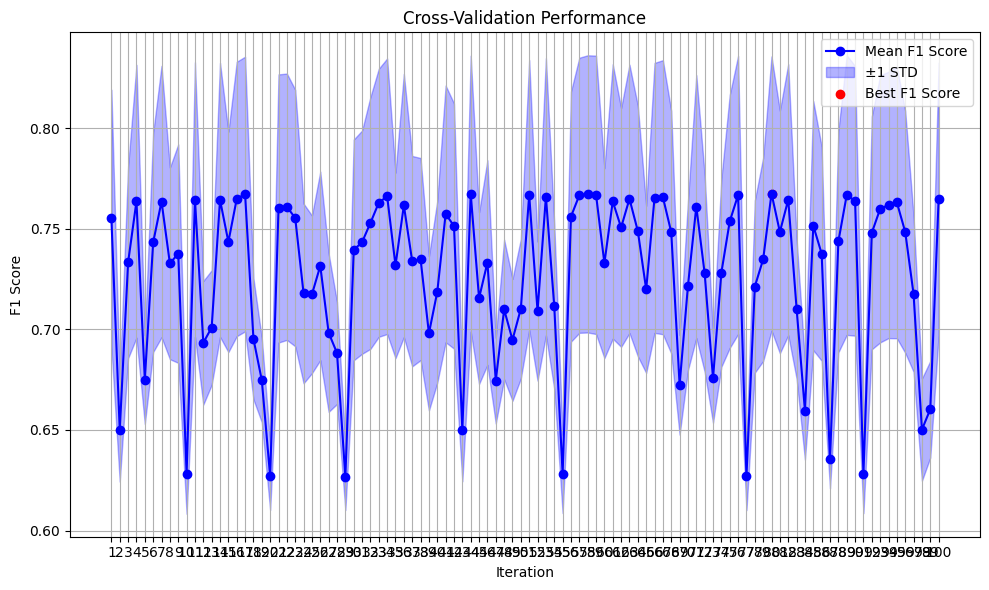

In [ ]:
#cross validation
import matplotlib.pyplot as plt
import numpy as np

# Extract cross-validation results
cv_results = random_search.cv_results_

# Plot mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_results['mean_test_score']) + 1), cv_results['mean_test_score'], marker='o', label='Mean F1 Score', color='b')
plt.fill_between(range(1, len(cv_results['mean_test_score']) + 1),
                 cv_results['mean_test_score'] - cv_results['std_test_score'],
                 cv_results['mean_test_score'] + cv_results['std_test_score'],
                 alpha=0.3, color='b', label='±1 STD')

# Highlight the best performing point
best_index = np.argmax(cv_results['mean_test_score'])
plt.scatter(best_index + 1, cv_results['mean_test_score'][best_index], marker='o', color='r', label='Best F1 Score')

plt.title('Cross-Validation Performance')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.xticks(range(1, len(cv_results['mean_test_score']) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Cross-Validation Performance.png')
plt.show()

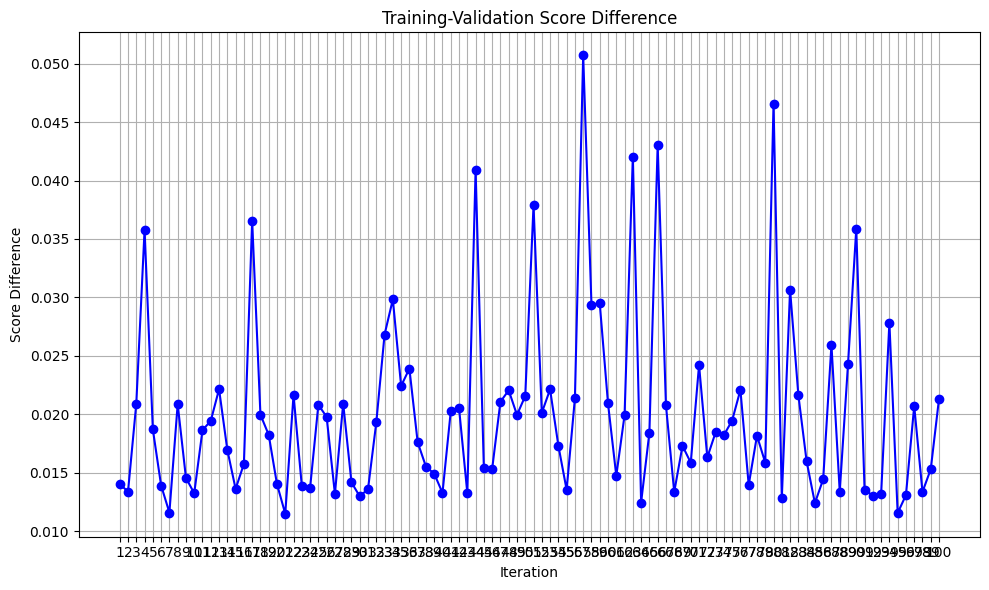

In [ ]:
# Extract cross-validation results
train_scores = cv_results['mean_train_score']
test_scores = cv_results['mean_test_score']

# Calculate the difference between training and validation scores
score_diffs = train_scores - test_scores

# Plot the difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(score_diffs) + 1), score_diffs, marker='o', color='b')
plt.title('Training-Validation Score Difference')
plt.xlabel('Iteration')
plt.ylabel('Score Difference')
plt.xticks(range(1, len(score_diffs) + 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('Training-Validation Score Difference.png')
plt.show()

In [ ]:
# Evaluation on the test set
best_lgbm = random_search.best_estimator_
y_pred = best_lgbm.predict(X_test_selected)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set F1 Score:", f1_score(y_test, y_pred))

Test Set Accuracy: 0.7099365557533434
Test Set F1 Score: 0.7772598226490484


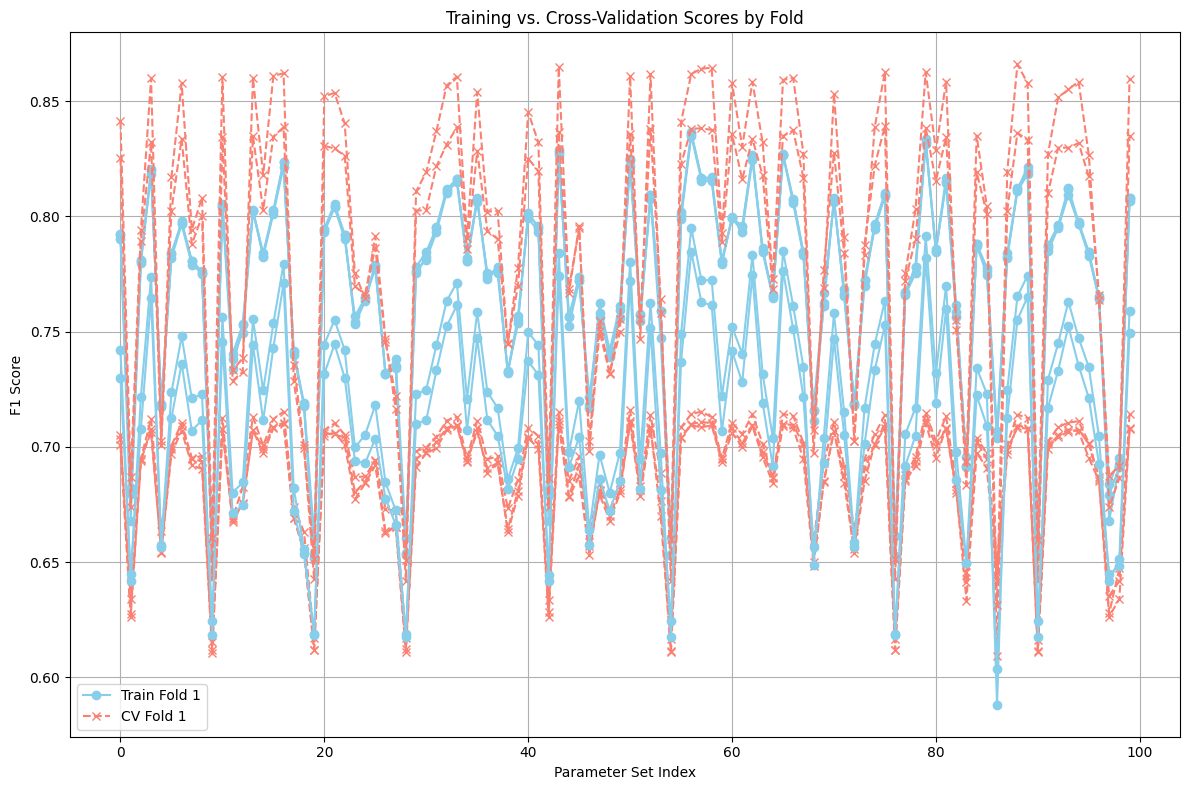

Average Training Scores:  0.7469245133246447
Average CV Scores:  0.7268628860729597


In [ ]:
#check stability across folds
import matplotlib.pyplot as plt
import numpy as np

# Access cv_results from RandomizedSearchCV
cv_results = random_search.cv_results_

# Define parameter indices for easier navigation
params = np.arange(len(cv_results['mean_test_score']))

# Initialize figures for plotting
plt.figure(figsize=(12, 8))

# Iterate over each fold to plot
for i in range(5):  # Assuming 5-fold CV as specified in your setup
    train_scores = cv_results[f'split{i}_train_score']
    test_scores = cv_results[f'split{i}_test_score']

    # Plot training and test scores
    plt.plot(params, train_scores, marker='o', linestyle='-', label=f'Train Fold {i+1}' if i == 0 else None, color='skyblue')
    plt.plot(params, test_scores, marker='x', linestyle='--', label=f'CV Fold {i+1}' if i == 0 else None, color='salmon')

# Enhancing the plot
plt.title('Training vs. Cross-Validation Scores by Fold')
plt.xlabel('Parameter Set Index')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Training vs. Cross-Validation scores by Fold.png')
# Show plot
plt.show()

# Calculating and printing average scores across all folds for a summary
mean_train_scores = np.mean([cv_results[f'split{i}_train_score'] for i in range(5)], axis=0)
mean_test_scores = np.mean([cv_results[f'split{i}_test_score'] for i in range(5)], axis=0)
print("Average Training Scores: ", np.mean(mean_train_scores))
print("Average CV Scores: ", np.mean(mean_test_scores))

In [ ]:
 # Assuming best_lgbm is your optimized model from RandomizedSearchCV
y_train_pred = best_lgbm.predict(X_train_selected)
y_test_pred = best_lgbm.predict(X_test_selected)

# Probability scores for ROC-AUC
y_train_proba = best_lgbm.predict_proba(X_train_selected)[:, 1]
y_test_proba = best_lgbm.predict_proba(X_test_selected)[:, 1]

In [ ]:
# Training Metrics
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
roc_auc_train = roc_auc_score(y_train_resampled, y_train_proba)
f1_train=f1_score(y_train_resampled, y_train_pred)

# Test Metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
f1_test=f1_score(y_test, y_test_pred)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1: {f1_train:.4f}, ROC-AUC: {roc_auc_train:.4f}")
print('classification_report:', classification_report(y_train_resampled, y_train_pred))


print("Test Metrics:")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1: {f1_test:.4f}, ROC-AUC: {roc_auc_test:.4f}")
print('classification_report:', classification_report(y_test, y_test_pred))

Training Metrics:
Accuracy: 0.7958, Precision: 0.7459, Recall: 0.8814, F1: 0.8080, ROC-AUC: 0.8819
classification_report:               precision    recall  f1-score   support

           0       0.86      0.71      0.78     55134
           1       0.75      0.88      0.81     52483

    accuracy                           0.80    107617
   macro avg       0.80      0.80      0.79    107617
weighted avg       0.81      0.80      0.79    107617

Test Metrics:
Accuracy: 0.7099, Precision: 0.7195, Recall: 0.8451, F1: 0.7773, ROC-AUC: 0.7523
classification_report:               precision    recall  f1-score   support

           0       0.69      0.51      0.58      8788
           1       0.72      0.85      0.78     13121

    accuracy                           0.71     21909
   macro avg       0.70      0.68      0.68     21909
weighted avg       0.71      0.71      0.70     21909



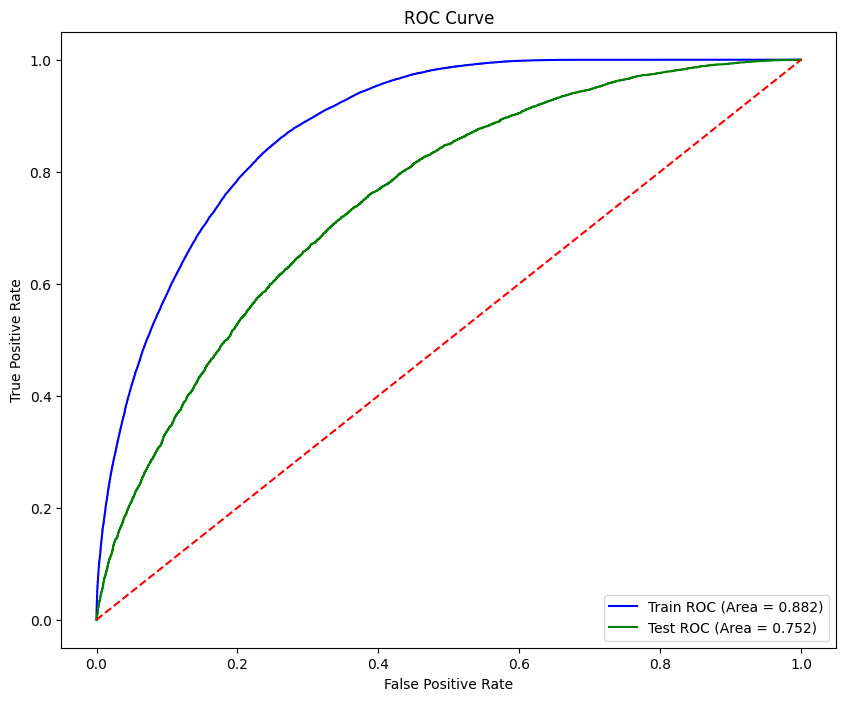

In [ ]:
# Compute ROC curve data
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (Area = {roc_auc_train:.3f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (Area = {roc_auc_test:.3f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('ROC Curve train and test.png')
plt.show()

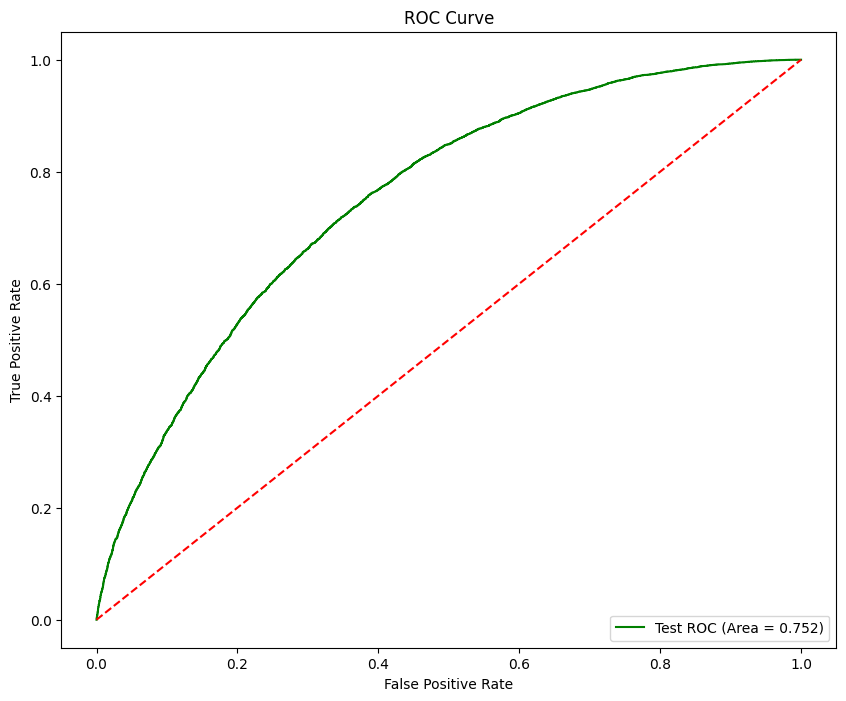

In [ ]:
# Compute ROC curve data

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (Area = {roc_auc_test:.3f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('ROC CURVE.png')
plt.show()

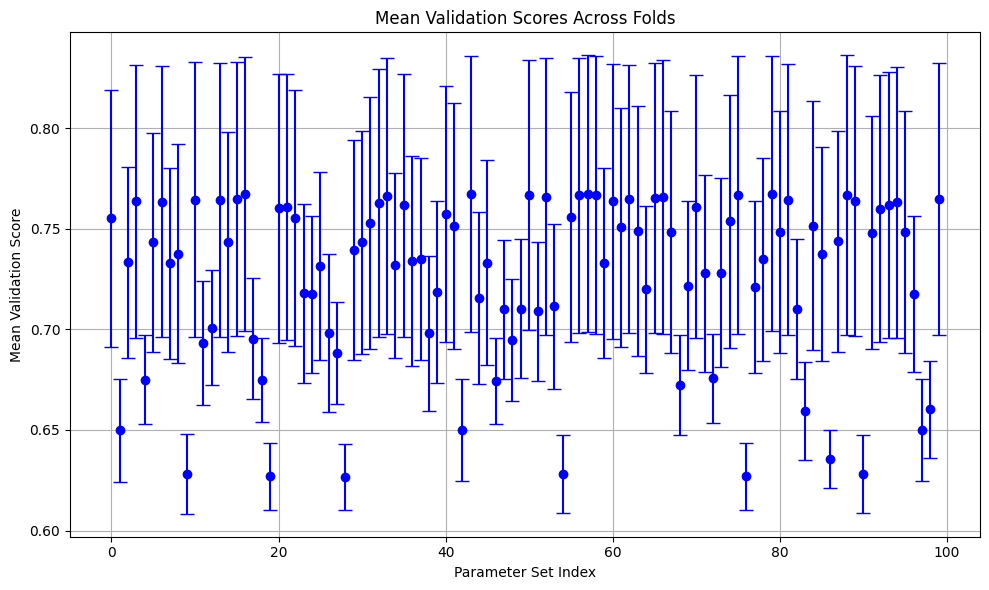

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Access cv_results from RandomizedSearchCV
cv_results = random_search.cv_results_

# Extract mean and standard deviation of validation scores across folds
mean_val_scores = cv_results['mean_test_score']
std_val_scores = cv_results['std_test_score']

# Plot mean validation scores with error bars representing standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(mean_val_scores)), mean_val_scores, yerr=std_val_scores, fmt='o', color='b', capsize=5)
plt.title('Mean Validation Scores Across Folds')
plt.xlabel('Parameter Set Index')
plt.ylabel('Mean Validation Score')
plt.grid(True)
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7575, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2650
[LightGBM] [Info] Number of data points in the train set: 8609, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.879893 -> initscore=1.991419
[LightGBM] [Info] Start training from score 1.991419
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12760, number of negative: 4458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

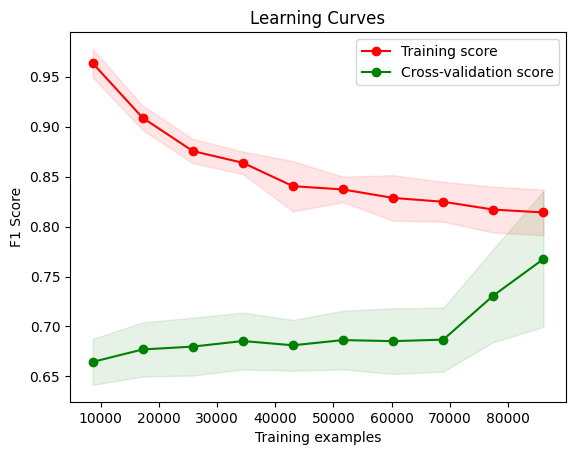

In [ ]:
#Learning curve
from sklearn.model_selection import learning_curve

# Corrected to use resampled data for generating learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_lgbm, X_train_selected, y_train_resampled, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.show()

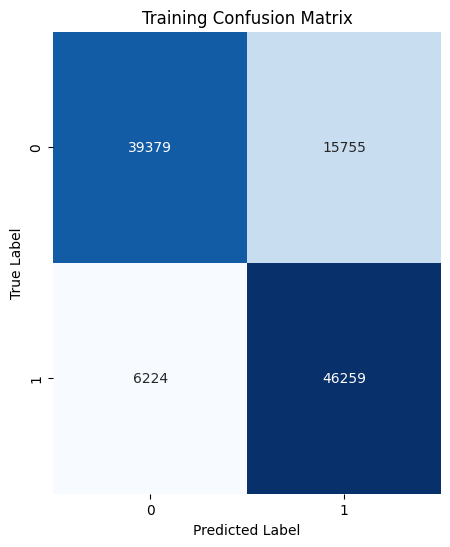

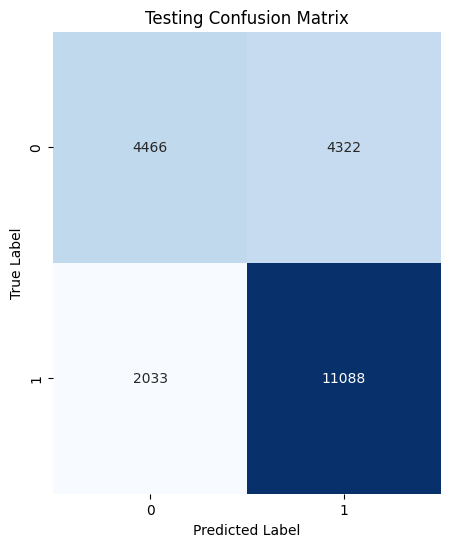

In [ ]:
# Calculate confusion matrices
cm_train = confusion_matrix(y_train_resampled, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', save_path=None):
    plt.figure(figsize=(5, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  

# Define file paths for saving figures
train_cm_save_path = 'training_confusion_matrix.png'
test_cm_save_path = 'testing_confusion_matrix.png'

# Plot confusion matrices and save figures
plot_confusion_matrix(cm_train, title='Training Confusion Matrix', save_path=train_cm_save_path)
plot_confusion_matrix(cm_test, title='Testing Confusion Matrix', save_path=test_cm_save_path)